In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import AlphaSelection     #to test alpha values to see the model complexity as higher alpha value denotes a less complex model,and vice versa. we can find appropriate aplha value by this.                                                  
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.features import FeatureImportances
from yellowbrick.model_selection import CVScores    # It will help to plot every cv and help to check the evenly or unevenly folds
from yellowbrick.model_selection import LearningCurve   #to plot the learning curve of train data and cross validated test data
from imblearn.over_sampling import SMOTE, RandomOverSampler
from pprint import pprint

In [2]:
missing_values = ["n/a", "na", "--", "NONE", "None", "none", "NA", "N/A"]

#Import data

In [3]:
data1 = pd.read_csv('Admission_Predict_Ver1.1.csv', na_values = missing_values)
data2 = pd.read_csv('Admission_Predict.csv')
data1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
data1.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
data2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data2.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
data = [data1,data2]
data = pd.concat(data)
data.shape

(900, 9)

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.drop('Serial No.',1,inplace=True)

In [7]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [ ]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#Bivariate Analysis & Multivariate Analysis

Text(0.5, 1.0, 'TOEFL SCORE vs GRE SCORE')

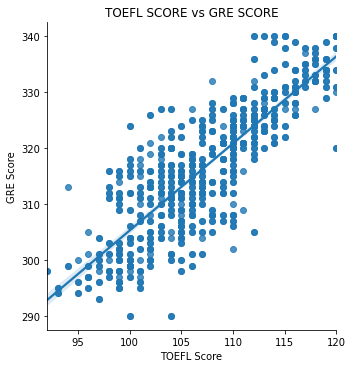

In [ ]:
lmplot = sns.lmplot(x = 'TOEFL Score', y = 'GRE Score', data = data )
plt.title('TOEFL SCORE vs GRE SCORE')

Text(0.5, 1.0, 'UNIVERSITY RATING vs GRE SCORE')

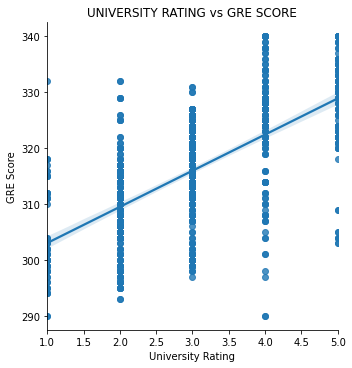

In [ ]:
lmplot = sns.lmplot(x = 'University Rating', y = 'GRE Score', data = data )
plt.title('UNIVERSITY RATING vs GRE SCORE')

' CGPA and GRE score has linear relationship for most of the data points. when viewed with Research score than we can find that \n    students with Research=1 has more CGPA and GRE score as compared to Research=0. Look at the cluster formation, orange cluster is above the blue'

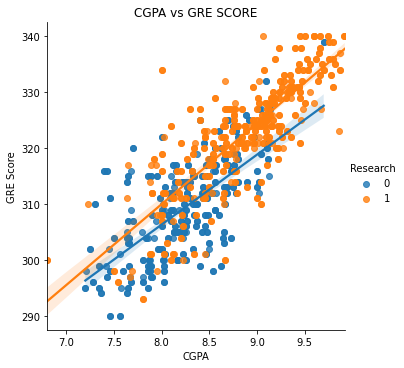

In [ ]:
lmplot = sns.lmplot(x = 'CGPA', y = 'GRE Score',hue='Research', data = data )
plt.title('CGPA vs GRE SCORE')
''' CGPA and GRE score has linear relationship for most of the data points. when viewed with Research score than we can find that 
    students with Research=1 has more CGPA and GRE score as compared to Research=0. Look at the cluster formation, orange cluster is above the blue'''

Text(0.5, 1.0, 'SOP(Statement of Purpose) vs GRE SCORE')

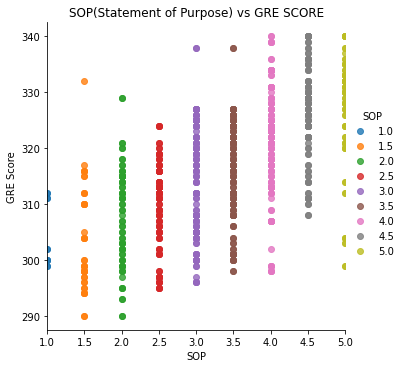

In [ ]:
lmplot = sns.lmplot(x = 'SOP', y = 'GRE Score',hue = 'SOP', data = data )
plt.title('SOP(Statement of Purpose) vs GRE SCORE')

Text(0.5, 1.0, 'SOP(Statement of Purpose) vs CGPA')

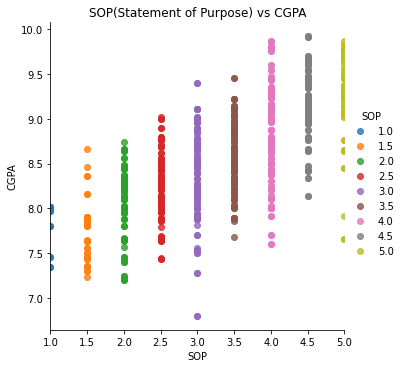

In [ ]:
lmplot = sns.lmplot(x = 'SOP', y = 'CGPA',hue='SOP', data = data)
plt.title('SOP(Statement of Purpose) vs CGPA')

from above last two plots we can see that the students with more SOP value between 4 and 5 also have higher CGPA and GRE scores

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

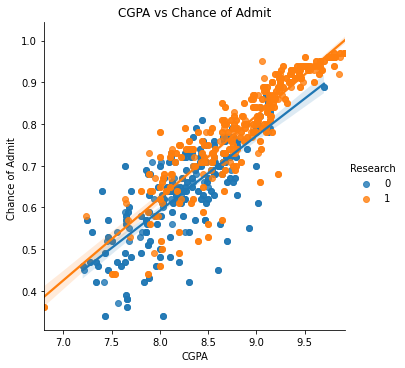

In [ ]:
lmplot = sns.lmplot(x = 'CGPA', y = 'Chance of Admit ',hue='Research', data = data )
plt.title('CGPA vs Chance of Admit')

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

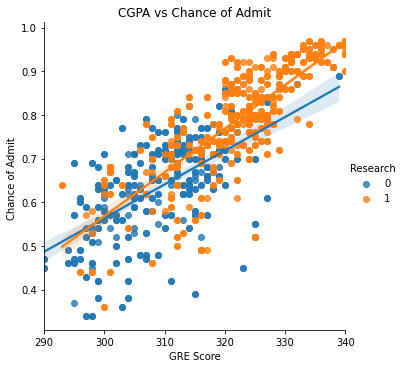

In [ ]:
lmplot = sns.lmplot(x = 'GRE Score', y = 'Chance of Admit ',hue = 'Research', data = data )
plt.title('CGPA vs Chance of Admit')

CGPA vs CHANCE OF ADMISSION & GRE SCORE vs CHANCE OF ADMISSION has linear realtionship but we can see that students with research = 1 has higher chances of getting admission

#Scaling the data

In [8]:
sc = StandardScaler()
sc.fit_transform(data)

array([[ 1.79338242,  1.76442585,  0.78586135, ...,  1.77116893,
         0.89644142,  1.39152406],
       [ 0.64935678, -0.04758825,  0.78586135, ...,  0.4722266 ,
         0.89644142,  0.26192563],
       [-0.054659  , -0.54177391, -0.08947926, ..., -0.97659369,
         0.89644142, -0.02047397],
       ...,
       [ 1.17736861,  1.43496874,  0.78586135, ...,  1.43810679,
         0.89644142,  1.32092416],
       [-0.40666689, -0.70650247, -0.08947926, ...,  0.32234864,
        -1.11552186, -0.37347348],
       [ 1.44137453,  1.59969729,  0.78586135, ...,  1.78782204,
         0.89644142,  1.60332377]])

In [9]:
X = data.drop('Chance of Admit ',1)
y = data['Chance of Admit ']

#Train-test split

In [10]:
X_train,X_test,y_train,y_test = tts(X, y, test_size=0.2, random_state=42)

In [11]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)              #average error
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))   
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2_score: ', r2_score(y_test,y_pred))

    return evaluate

#Model application

##Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

In [12]:
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error for Linear Regression is: ', linear_regression_rmse)
linear_regression_r2score = r2_score(y_test,y_pred)
print('R2 score for linear regression is: ', linear_regression_r2score)

Root Mean Squared Error for Linear Regression is:  0.058344068501875276
R2 score for linear regression is:  0.8006784331174059


##Lasso

In [13]:
lasso = Lasso(random_state=42)
pprint(lasso.get_params())

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}


In [14]:
random_params = ({'alpha' : [0.008],
                  'tol' : [0.01], 
                  'selection' : ['random','cyclic']})
random_model = RandomizedSearchCV(estimator = lasso, param_distributions=random_params, n_iter=100, cv=5)
random_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=42, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': [0.008],
                                        'selection': ['random', 'cyclic'],
                                        'tol': [0.01]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

The Best score or mean cv is 0.77% via RandomizedSearchCV which is quite good

In [15]:
random_model.best_score_

0.7744473400908042

In [16]:
lasso = Lasso(alpha=0.008, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=42, selection='cyclic',
                                   tol=0.0001, warm_start=False)
lasso.fit(X_train,y_train)

y_pred_lasso = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error for Linear Regression is: ', lasso_rmse)
lasso_r2score = r2_score(y_test,y_pred_lasso)
print('R2 score for linear regression is: ', lasso_r2score)


Root Mean Squared Error for Linear Regression is:  0.06748331288709618
R2 score for linear regression is:  0.7333425871433044


AlphaSelection of yellowbrick library is used to find the alpha value for lasso via plotting

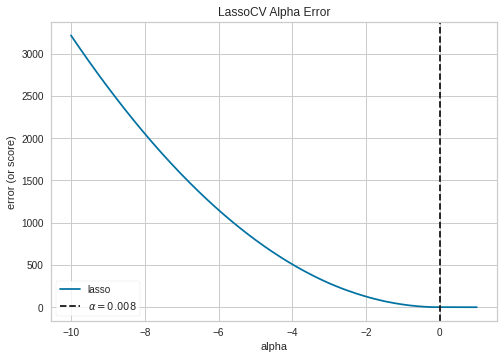

In [ ]:
alphas = np.linspace(-10,1,400)
lassoCV = LassoCV(alphas=alphas, tol = 0.01)
visualizer = AlphaSelection(lassoCV)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

ResidualPlot is the difference between the actual and predicted value.
The train R-sqaure and test R-square has little difference and most data is clustered near the black dark line i.e. near to 0 which is good by the way not very much but its a good plot

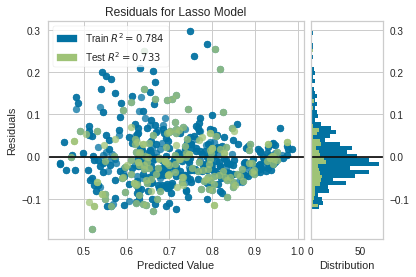

In [17]:
visualizer_lasso = ResidualsPlot(lasso)
visualizer_lasso.fit(X_train,y_train)
visualizer_lasso.score(X_test, y_test)
visualizer_lasso.poof()

We check the evenly spread of every cv here

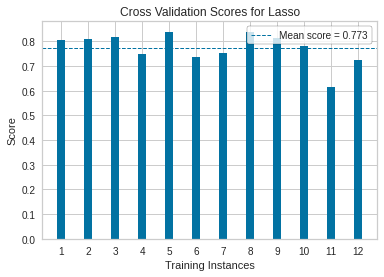

In [18]:
lasso = Lasso(alpha=0.008, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=42, selection='cyclic',
                                   tol=0.0001, warm_start=False)
lasso.fit(X_train,y_train)    #we need to fit the lasso(model) too and later the yellobrick's CVscore object i.e. visualizer
visualizer = CVScores(lasso, cv=12)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test,y_test)
visualizer.poof() 

Look at the shade around the test curve(green) this means it is highly overfitted.
If the model suffers from error due to bias, then there will likely be more variability around the training score curve.
After this analysis we cannot use it

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


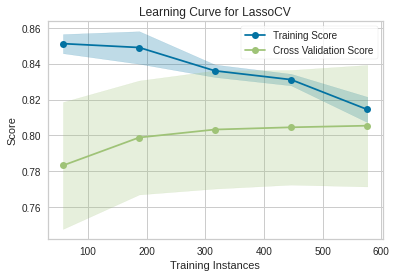

In [20]:
lassocv = LassoCV()
lassocv.fit(X_train,y_train)
visualizer = LearningCurve(lassocv)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test,y_test)
visualizer.poof() 

In [22]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error for Linear Regression is: ',lasso_rmse)
lasso_r2score = r2_score(y_test,y_pred_lasso)
print('R2 score for linear regression is: ', lasso_r2score)

Root Mean Squared Error for Linear Regression is:  0.06748331288709618
R2 score for linear regression is:  0.7333425871433044


##Random Forest Regressor

In [23]:
random_forest = RandomForestRegressor(random_state=1)

print('Parameters currently in use:\n')
pprint(random_forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
n_estimators = [int (x) for x in np.linspace(100,2000,num=15)]
max_depth = [int (x) for x in np.linspace(10,110,num=10)]

random_parameters = ({'n_estimators': n_estimators,
               'max_depth' : max_depth,
               'min_samples_leaf' : [1,2,3],
               'max_features' : ['auto','sqrt','log2'],
               'min_samples_split' : [2,5,10,12],
               'bootstrap' : [True, False],
               'n_jobs' : [-1]})

random_search_rf = RandomizedSearchCV(random_forest, param_distributions= random_parameters, n_iter=100, cv=5)
fitting_random_search_rf = random_search_rf.fit(X_train,y_train)

In [91]:
random_forest = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=32, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=507, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
random_forest.fit(X_train,y_train)

y_pred = random_forest.predict(X_test)
random_forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("The RMSE score for random forest is :",random_forest_rmse)
random_forest_r2score = r2_score(y_test,y_pred)
print("The r2 score for random forest is :",random_forest_r2score)

The RMSE score for random forest is : 0.031434802602159265
The r2 score for random forest is : 0.9421394781047804


The validation curve is not cnverging with the training curve so we can benifit from adding more data. We can use SMOTE or RandomOverSampler for this

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


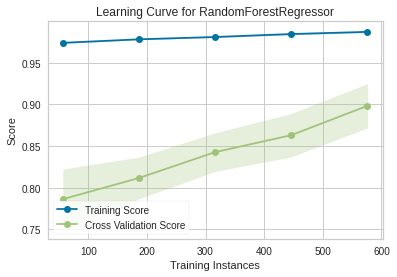

In [92]:
randomforest_learning_curve = RandomForestRegressor(bootstrap = True, ccp_alpha=0.0, criterion='mse',
                               max_depth=32, max_features='sqrt', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, min_samples_leaf=1,
                               min_samples_split=2, min_weight_fraction_leaf=0.0,
                               n_estimators=507, n_jobs=-1, oob_score=True,
                               random_state=1, verbose=0, warm_start=False)
randomforest_learning_curve.fit(X_train,y_train)
visualizer = LearningCurve(randomforest_learning_curve)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test,y_test)
visualizer.poof() 

Look at the green points of cross validation which are predicted by the model, they are very far away from the actual data which means there is overfitting

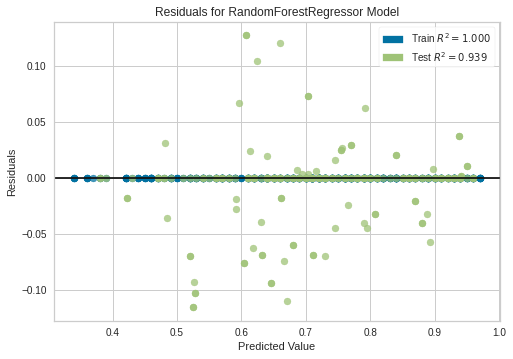

In [ ]:
visualizer = ResidualsPlot(random_forest, hist=False)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
# visualizer = RadViz(size=(500,600))
visualizer.poof()

Here we get the feature importance via yellowbrick library

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


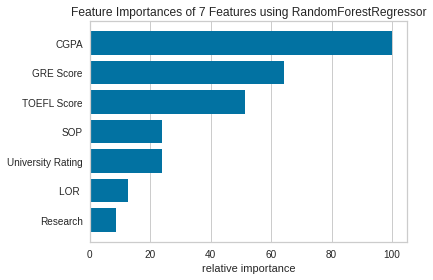

In [28]:
feature_importance_visualizer = FeatureImportances(random_forest)
feature_importance_visualizer.fit(X, y)
feature_importance_visualizer.poof()

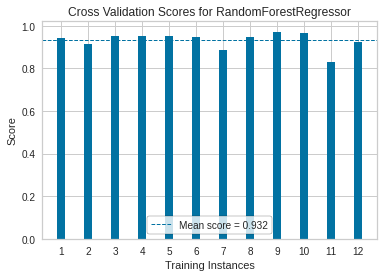

In [29]:
random_forest.fit(X_train,y_train)    #we need to fit the random forest(model) too and later the yellobrick's CVscore object i.e. visualizer
visualizer = CVScores(random_forest, cv=12)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test,y_test)
visualizer.poof() 

#RandomOverSampler

In [30]:
random_over_sampler = RandomOverSampler(random_state=42)
X_train_over_sampler, y_train_over_sampler = random_over_sampler.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got continuous instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Applied Random forest with oversampling 

In [31]:
random_forest_os = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
random_forest_os.fit(X_train_over_sampler, y_train_over_sampler)

y_pred = random_forest_os.predict(X_test)
random_forest_os_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("The RMSE score for random forest is :",random_forest_os_rmse)
random_forest_os_r2score = r2_score(y_test,y_pred)
print("The r2 score for random forest is :",random_forest_os_r2score)

The RMSE score for random forest is : 0.031043567800384062
The r2 score for random forest is : 0.9435707694495161


For some data the residual is high but for most of the data it is very less.
Look at the point above y-axis : 0.10, this means there is overfitting because its actual data is near to 0.00 but predicted is too far from it

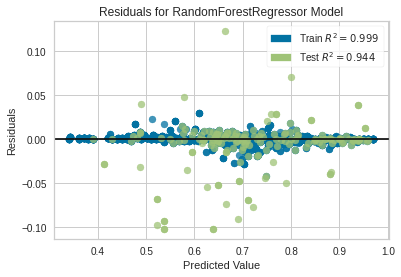

In [32]:
visualizer = ResidualsPlot(random_forest_os, hist=False)
visualizer.fit(X_train_over_sampler, y_train_over_sampler)
visualizer.score(X_test, y_test)
visualizer.poof()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


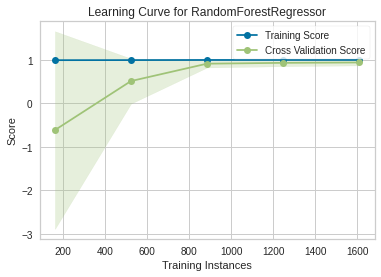

In [33]:
randomforest_learning_curve = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
randomforest_learning_curve.fit(X_train_over_sampler, y_train_over_sampler)
visualizer = LearningCurve(randomforest_learning_curve)
visualizer.fit(X_train_over_sampler, y_train_over_sampler)        
visualizer.score(X_test,y_test)
visualizer.poof() 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


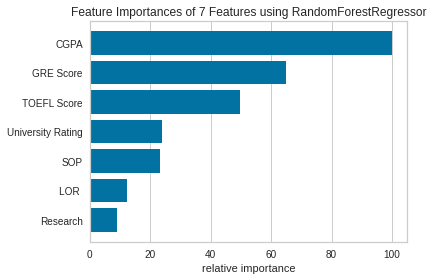

In [34]:
feature_importance_visualizer = FeatureImportances(random_forest_os)
feature_importance_visualizer.fit(X, y)
feature_importance_visualizer.poof()

##Extra Tree Regressor

In [35]:
extra_trees = ExtraTreesRegressor(random_state=1)
pprint(extra_trees.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
extra_n_estimators = [int (x) for x in np.linspace(450,1250,num=10)]
random_params = ({'n_estimators' : extra_n_estimators,
                  'max_features' : ['sqrt'],
                  'min_samples_leaf' : [1,2,3,4], 
                  'min_samples_split' : [3,4,5,6],      
                  'n_jobs' : [-1]})
random_extra_tree = RandomizedSearchCV(extra_trees, param_distributions=random_params, n_iter=100, cv=12)
random_extra_tree.fit(X_train,y_train)

In [37]:
extra_tree = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=983, n_jobs=-1, oob_score=False,
                    random_state=1, verbose=0, warm_start=False)

extra_tree.fit(X_train_over_sampler,y_train_over_sampler)  

y_pred = extra_tree.predict(X_test)

extra_tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("The RMSE score for random forest is :",extra_tree_rmse)

extra_tree_r2score = r2_score(y_test,y_pred)
print("The r2 score for random forest is :",extra_tree_r2score)  

The RMSE score for random forest is : 0.0253108482252945
The r2 score for random forest is : 0.9624876500846273


Look at the evenness of every cv, they are almost same

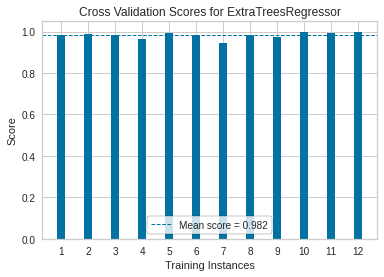

In [38]:
visualizer = CVScores(extra_tree, cv=12)
visualizer.fit(X_train_over_sampler, y_train_over_sampler)        
visualizer.score(X_test,y_test)
visualizer.poof() 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


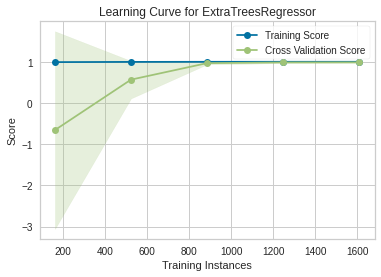

In [39]:
extra_learning_curve =  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=983, n_jobs=-1, oob_score=False,
                    random_state=1, verbose=0, warm_start=False)
extra_learning_curve.fit(X_train_over_sampler, y_train_over_sampler)
visualizer = LearningCurve(extra_learning_curve)
visualizer.fit(X_train_over_sampler, y_train_over_sampler)        
visualizer.score(X_test,y_test)
visualizer.poof() 

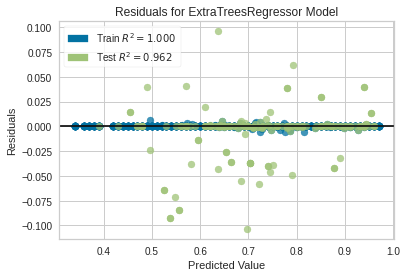

In [41]:
visualizer = ResidualsPlot(extra_tree, hist=False)
visualizer.fit(X_train_over_sampler, y_train_over_sampler)
visualizer.score(X_test, y_test)
visualizer.poof()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


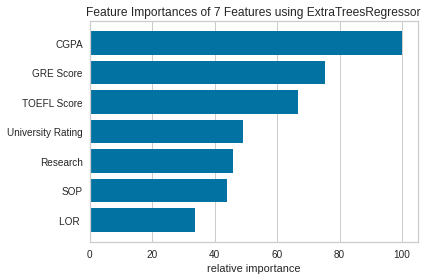

In [42]:
feature_importance_visualizer = FeatureImportances(extra_tree)
feature_importance_visualizer.fit(X, y)
feature_importance_visualizer.poof()

#Decision Tree

In [43]:
dtree = DecisionTreeRegressor(random_state=42)
pprint(dtree.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [30]:
max_depth = [int (x) for x in np.linspace(10,25,num=10)]

random_parameters = ({'criterion' : ['mse','friedman_mse'],
                'max_depth' : max_depth,
                'max_features' : ['auto'],
                'splitter' : ['random','best'],
               'min_samples_leaf' : [5,6],
               'min_samples_split' : [6,7],
               })

random_search_dtree_1 = RandomizedSearchCV(dtree, param_distributions= random_parameters, n_iter=100, cv=5)
random_search_dtree_1.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=42,
                                                   splitter='best'),
                   iid='dep

In [31]:
y_pred = random_search_dtree_1.predict(X_test)
random_search_dtree_1_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(random_search_dtree_1_rmse)
random_search_dtree_1_r2score = r2_score(y_test,y_pred)
print(random_search_dtree_1_r2score)

0.054592590167719376
0.8416270479133063


In [32]:
random_search_dtree_1.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [44]:
dtree = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=19,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
dtree_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(dtree_rmse)
dtree_r2score = r2_score(y_test,y_pred)
print(dtree_r2score)

0.04061962215116856
0.9033876535498986


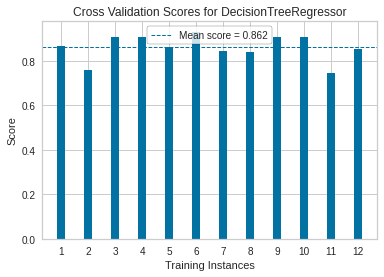

In [45]:
visualizer = CVScores(dtree, cv=12)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test,y_test)
visualizer.poof() 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


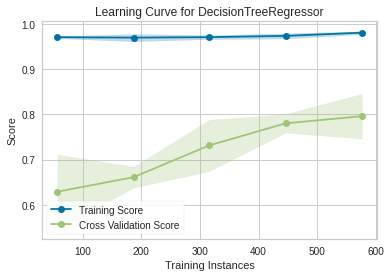

In [46]:
dtree_learning_curve = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=19,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
dtree_learning_curve.fit(X_train_over_sampler, y_train_over_sampler)
visualizer = LearningCurve(dtree_learning_curve)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test,y_test)
visualizer.poof() 

In [47]:
# with oversampling

dtree_os = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
dtree_os.fit(X_train_over_sampler,y_train_over_sampler)
y_pred = dtree_os.predict(X_test)
dtree_os_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(dtree_os_rmse)
dtree_os_r2score = r2_score(y_test,y_pred)
print(dtree_os_r2score)

0.05528369681468612
0.8210403899638541


Decision tree with random over sampling does not give good result as compared to without random over sampling


##SVR

In [48]:
from pprint import pprint
svr = SVR()
pprint(svr.get_params())

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [ ]:
svr_random_parameters = ({'kernel' : ['rbf'],
                          'degree' : [3,4,5],
                          'gamma' : ['auto','scale'],
                          'C' : [1,10,100,1000,10000],
                           'coef0':[0,1],
                          'max_iter' : [-1],
                          'epsilon' : [0,0.01,0.1,0.5]})
random_search_svr = RandomizedSearchCV(svr, param_distributions = svr_random_parameters, n_iter = 100, cv=15, n_jobs=-1, random_state = 42)
fitting_random_search_svr = random_search_svr.fit(X_train,y_train)

In [ ]:
print("Grid scores on training set:")
means = fitting_random_search_svr.cv_results_['mean_test_score']
stds = fitting_random_search_svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, fitting_random_search_svr.cv_results_['params']):  #The key 'params' is used to store a list of parameter settings dicts for all the parameter candidates.
    print("%0.3f (+/-%0.03f) for %r"% (mean, std*2, params))

Grid scores on training set:
0.837 (+/-0.131) for {'max_iter': -1, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0, 'degree': 3, 'coef0': 1, 'C': 1}
-0.265 (+/-0.358) for {'max_iter': -1, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.5, 'degree': 3, 'coef0': 0, 'C': 1}
0.720 (+/-0.136) for {'max_iter': -1, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'degree': 5, 'coef0': 1, 'C': 10}
0.728 (+/-0.137) for {'max_iter': -1, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'degree': 4, 'coef0': 0, 'C': 100}
0.818 (+/-0.199) for {'max_iter': -1, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0, 'degree': 4, 'coef0': 0, 'C': 100}
0.675 (+/-0.110) for {'max_iter': -1, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.1, 'degree': 3, 'coef0': 1, 'C': 1000}
0.800 (+/-0.125) for {'max_iter': -1, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0, 'degree': 5, 'coef0': 1, 'C': 10000}
-0.265 (+/-0.358) for {'max_iter': -1, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.5, 'degree': 4, 'coef0': 1, 

In [54]:
svr = SVR(C=10, cache_size=200, coef0=0, degree=5, epsilon=0.01, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr.fit(X_train,y_train)

y_pred_svr = svr.predict(X_test)

svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(svr_rmse)

svr_r2score = r2_score(y_test,y_pred_svr)
print(svr_r2score)

0.03934993142780734
0.9093330865559773


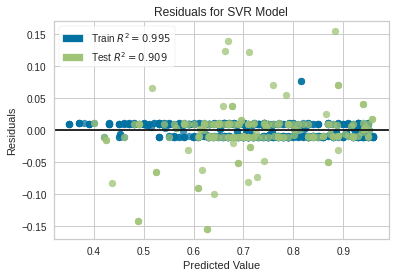

In [52]:
visualizer = ResidualsPlot(svr, hist=False)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


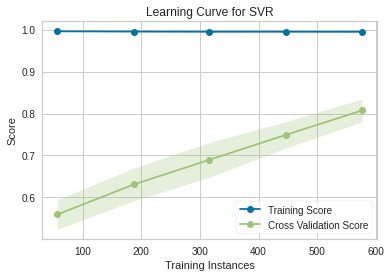

In [53]:
svr_learning_curve = SVR(C=10, cache_size=200, coef0=0, degree=5, epsilon=0.01, gamma='auto',
                         kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_learning_curve.fit(X_train, y_train)
visualizer = LearningCurve(svr_learning_curve)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test,y_test)
visualizer.poof() 

In [55]:
svr_os = SVR(C=10, cache_size=200, coef0=0, degree=0, epsilon=0.01, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_os.fit(X_train_over_sampler,y_train_over_sampler)

y_pred_svr_os = svr_os.predict(X_test)
svr_os_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr_os))
print(svr_os_rmse)
svr_os_r2score = r2_score(y_test,y_pred_svr_os)
print(svr_os_r2score)

0.039739031807733145
0.90753115450996


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


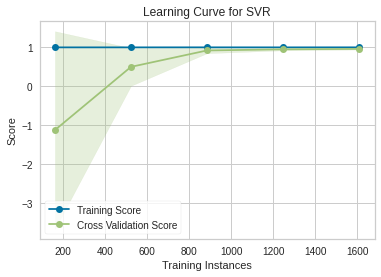

In [56]:
svr_learning_curve = SVR(C=10, cache_size=200, coef0=0, degree=5, epsilon=0.01, gamma='auto',
                         kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_learning_curve.fit(X_train_over_sampler, y_train_over_sampler)
visualizer = LearningCurve(svr_learning_curve)
visualizer.fit(X_train_over_sampler, y_train_over_sampler)        
visualizer.score(X_test,y_test)
visualizer.poof() 

##Voting Regressor

In [69]:
weight = [2,3]
voting = VotingRegressor([('random forest over sampling', random_forest_os), ('extra tree random forest', extra_tree)], weights = weight)
voting.fit(X_train_over_sampler, y_train_over_sampler)

VotingRegressor(estimators=[('random forest over sampling',
                             RandomForestRegressor(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=12,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=4,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=700, n_jobs=-1,
  

In [70]:
y_pred_voting = voting.predict(X_test)
voting_rmse = np.sqrt(mean_squared_error(y_test, y_pred_voting))
print(voting_rmse)
voting_r2score = r2_score(y_test,y_pred_voting)
print(voting_r2score)

0.027079808810644354
0.9570609868269145


#Resultant Dataframe

In [84]:
result = pd.DataFrame()
result['Models'] = ['Linear Regression','Lasso','Random forest', 'Random Forest with random over sampling', 'Extra tree with random over sampling',
                    'Support Vector Regression','Support Vector Regression with random over sampling', 'Voting Regressor']

In [85]:
result['RMSE scores'] = [linear_regression_rmse, lasso_rmse, random_forest_rmse, random_forest_os_rmse, extra_tree_rmse, svr_rmse, svr_os_rmse, voting_rmse]

In [86]:
result

,Models,RMSE scores
0,Linear Regression,0.058344
1,Lasso,0.067483
2,Random forest,0.031435
3,Random Forest with random over sampling,0.031044
4,Extra tree with random over sampling,0.025311
5,Support Vector Regression,0.039350
6,Support Vector Regression with random over sam...,0.039739
7,Voting Regressor,0.027080


In [87]:
result = result.sort_values(by='RMSE scores')
result

,Models,RMSE scores
4,Extra tree with random over sampling,0.025311
7,Voting Regressor,0.027080
3,Random Forest with random over sampling,0.031044
2,Random forest,0.031435
5,Support Vector Regression,0.039350
6,Support Vector Regression with random over sam...,0.039739
0,Linear Regression,0.058344
1,Lasso,0.067483


#My Prediction

In [118]:
chance = [315, 105, 4, 4, 4, 9.5, 0.95]
chance = np.array(chance)
chance = chance.reshape(-1,7)
My_prediced_chance = extra_tree.predict(chance)
My_prediced_chance

array([0.81332146])